### Credit Card Default Model Building

In [1]:
# import libraries required for execution of dataset
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import train test split library
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# import model from xgboost
from xgboost import XGBClassifier

# import evaluation metrics from library
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_score, recall_score

## Read Data

In [2]:
# read the dataset
df = pd.read_csv("credit-card-default.csv", index_col = "ID")
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
defaulted    int64
dtype: object

In [4]:
# Information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [5]:
df.shape

(30000, 24)

### DataType Conversion

In [6]:
# converting data types of dataset

df[['SEX', 'EDUCATION', 'MARRIAGE']] = df[['SEX', 'EDUCATION', 'MARRIAGE']].astype(object)

In [7]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulted'],
      dtype='object')

#### converting amount into float data type

In [8]:
# include selects "amount" numerical variables

df_num = df.select_dtypes(exclude = "object").drop(["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "AGE", "defaulted"], axis =1)

In [9]:
# convert int to float 
df_num = df_num.astype("float")

# print the first two rows 
df_num.head(2)

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,
1,20000.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [10]:
# storing repayment status in "df10"

df10 = df[["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "AGE", "defaulted"]]

In [11]:
# include selects categorical variables

df_cat = df.select_dtypes(include = "object")

In [12]:
# concatenates the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 

df = pd.concat([df_num, df10, df_cat], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   BILL_AMT1  30000 non-null  float64
 2   BILL_AMT2  30000 non-null  float64
 3   BILL_AMT3  30000 non-null  float64
 4   BILL_AMT4  30000 non-null  float64
 5   BILL_AMT5  30000 non-null  float64
 6   BILL_AMT6  30000 non-null  float64
 7   PAY_AMT1   30000 non-null  float64
 8   PAY_AMT2   30000 non-null  float64
 9   PAY_AMT3   30000 non-null  float64
 10  PAY_AMT4   30000 non-null  float64
 11  PAY_AMT5   30000 non-null  float64
 12  PAY_AMT6   30000 non-null  float64
 13  PAY_1      30000 non-null  int64  
 14  PAY_2      30000 non-null  int64  
 15  PAY_3      30000 non-null  int64  
 16  PAY_4      30000 non-null  int64  
 17  PAY_5      30000 non-null  int64  
 18  PAY_6      30000 non-null  int64  
 19  AGE        30000 non-null  int64  
 20  defaul

In [13]:
df.shape

(30000, 24)

### Missing Value Treatment

In [14]:
# Check for missing values

df.isnull().sum()

LIMIT_BAL    0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
AGE          0
defaulted    0
SEX          0
EDUCATION    0
MARRIAGE     0
dtype: int64

In [15]:
# check for five point summary

df.describe()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_AMT5,PAY_AMT6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,AGE,defaulted
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,...,4799.387633,5215.502567,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,35.485500,0.221200
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,...,15278.305679,17777.465775,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,9.217904,0.415062
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,...,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,21.000000,0.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,...,252.500000,117.750000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,28.000000,0.000000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,...,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,...,4031.500000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,...,426529.000000,528666.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,79.000000,1.000000


In [16]:
# description of categorical variables

df_cat = df.select_dtypes(include = "object")
df_cat.describe()

,SEX,EDUCATION,MARRIAGE
count,30000,30000,30000
unique,2,7,4
top,2,2,2
freq,18112,14030,15964


#### Inference:

No missing value found in the dataset

### Outliers Treatment

### 1. Visualization

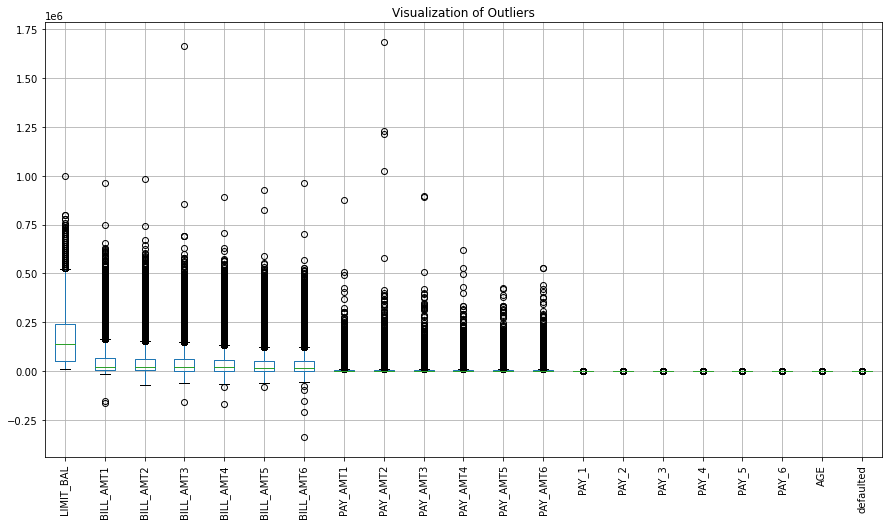

In [17]:
# Boxplot - visualization of Outliers

plt.figure(figsize = (15,8))

df.boxplot()

plt.xticks(rotation = 90)
plt.title("Visualization of Outliers")
plt.show()

In [18]:
# skewness of columns

df.skew()

LIMIT_BAL     0.992867
BILL_AMT1     2.663861
BILL_AMT2     2.705221
BILL_AMT3     3.087830
BILL_AMT4     2.821965
BILL_AMT5     2.876380
BILL_AMT6     2.846645
PAY_AMT1     14.668364
PAY_AMT2     30.453817
PAY_AMT3     17.216635
PAY_AMT4     12.904985
PAY_AMT5     11.127417
PAY_AMT6     10.640727
PAY_1         0.731975
PAY_2         0.790565
PAY_3         0.840682
PAY_4         0.999629
PAY_5         1.008197
PAY_6         0.948029
AGE           0.732246
defaulted     1.343504
SEX          -0.424183
EDUCATION     0.970972
MARRIAGE     -0.018742
dtype: float64

### Inference
In Pay amount the data is highly skewed, (Right skewed)

### Count plot of categorical variables

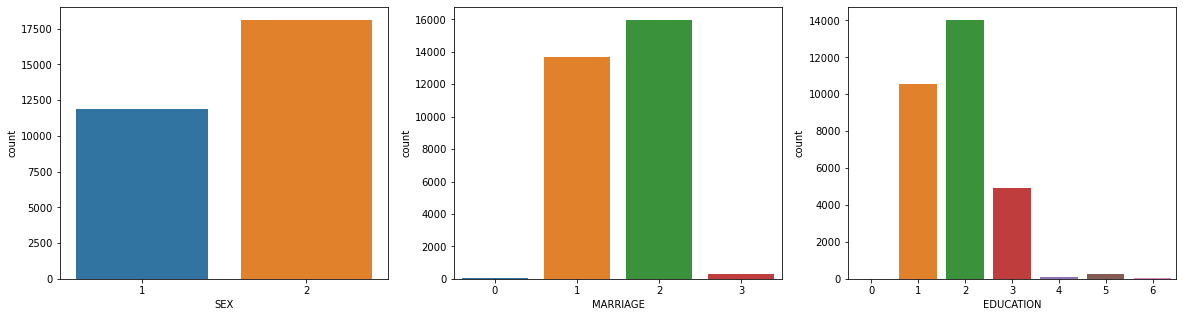

In [19]:
# count plot of categorical variables
# subplots used 

plt.figure(figsize = (20, 5))

plt.subplot(1,3,1)
sns.countplot(df["SEX"])

plt.subplot(1,3,2)
sns.countplot(df["MARRIAGE"])

plt.subplot(1,3,3)
sns.countplot(df["EDUCATION"])

plt.show()

#### 2. Using IQR Technique to remove outliers

####      i. Inter Quartile Range Outlier Treatment

In [20]:
# calculating inter quantile rate
# calculation of upper and lower quantile

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3 - q1

ll = q1 - (6 * iqr)
ul = q3 + (6 * iqr)

In [21]:
# removal of outliers 

df1 = df[~((df < ll) |(df > ul)).any(axis =1)]
df1.shape

(19902, 24)

In [22]:
df2 = df[~((df < ll) |(df > ul)).any(axis =1)]
df2.shape

(19902, 24)

In [23]:
# checking for value counts of Target Variable

df1["defaulted"].value_counts()

0    19902
Name: defaulted, dtype: int64

In [24]:
df1.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'AGE', 'defaulted', 'SEX', 'EDUCATION', 'MARRIAGE'],
      dtype='object')

#### Inference:
    
-- after applying IQR(Inter Quartile Range) technique, we are loosing the information 

-- Hence we have decided to use Zscore technique(6 Sigma Rule)

#### ii. Z_Score Technique

In [25]:
# import library

import scipy.stats as stats

In [26]:
# calculate limit balance zscore for removal of outliers

df["limit_bal_zscore"] = np.abs(stats.zscore(df["LIMIT_BAL"]))

df3 = df[df["limit_bal_zscore"] <3]

df3.shape

(29870, 25)

In [27]:
df3  = df3.drop("limit_bal_zscore", axis =1)

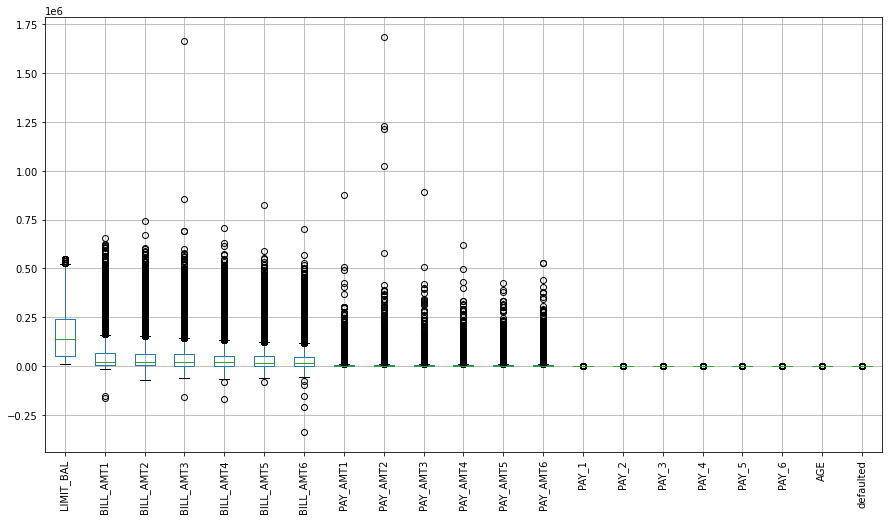

In [28]:
# Boxpot - visualizations of outliers

plt.figure(figsize = (15,8))
df3.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [29]:
# skewness of data after outlier treatment

df3.skew()

LIMIT_BAL     0.890764
BILL_AMT1     2.556427
BILL_AMT2     2.596050
BILL_AMT3     3.041318
BILL_AMT4     2.705308
BILL_AMT5     2.730439
BILL_AMT6     2.674824
PAY_AMT1     14.855567
PAY_AMT2     30.829747
PAY_AMT3     14.954217
PAY_AMT4     12.457026
PAY_AMT5     10.940209
PAY_AMT6     10.634967
PAY_1         0.734000
PAY_2         0.791601
PAY_3         0.841120
PAY_4         1.000201
PAY_5         1.008532
PAY_6         0.945311
AGE           0.733243
defaulted     1.339587
SEX          -0.425255
EDUCATION     0.971051
MARRIAGE     -0.019049
dtype: float64

#### observation

-- After removing outliers, the Pay Amount columns are almost normalized as compare to raw data.

### Handling Categorical Features

In [30]:
# select all categorical variables
df1_cat = df3.select_dtypes(include = "object")

# select all numerical variables
df1_num = df3.select_dtypes(exclude = "object")

# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
df_cat1 = pd.get_dummies(df1_cat, drop_first= True)
df_cat2 = pd.DataFrame(df_cat1)

# concatenates the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df4 = pd.concat([df1_num, df_cat2], axis = 1)

print("Shape of the df4 dataset : ", df4.shape)

df4.columns

Shape of the df4 dataset :  (29870, 31)


Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'AGE', 'defaulted', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [31]:
# The index above includes the columns present in dataset.

### Feature Selection

#### 1. Using Recursive Feature Elimination (RFE)

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

In [31]:
df4.shape 

(29870, 31)

In [32]:
# import libraries

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [33]:
# defining values for X and y

y = df4["defaulted"]
X = df4.drop("defaulted", axis =1)

# applying train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 5)

In [34]:
# checking for dimeinsions of variables created 

X_train.shape, y_test.shape

((20909, 30), (8961,))

In [35]:
# build the Logistic Regression model

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
# fiting Recursive feature selection

rfe = RFE(logreg)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression())

In [38]:
# defining a set of values as a dictionary for hyperparameters
# declaring GridSearchCV model
# fitting values to the gridsearchcv model

param = {"n_features_to_select": range(df2.shape[1])}
g_search = GridSearchCV(rfe, param_grid= param, cv=3)
g_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RFE(estimator=LogisticRegression()),
             param_grid={'n_features_to_select': range(0, 24)})

In [39]:
# best parameters
g_search.best_params_

{'n_features_to_select': 6}

In [40]:
rfe = RFE(logreg)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression())

In [41]:
# printing the best possible values

rfe_df = pd.DataFrame(rfe.ranking_, index = X_train.columns, columns =["RFE"])

In [42]:
rfe_df[rfe_df["RFE"]==1].index

Index(['BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT5', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'AGE', 'SEX_2',
       'EDUCATION_2', 'MARRIAGE_2'],
      dtype='object')

In [43]:
# ... are the best features obtained from Recursive Feature Elimination.

#### 2. Using Correlation-Coefficient

The logic behind using correlation for feature selection is that the good variables are highly correlated with the target.  Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

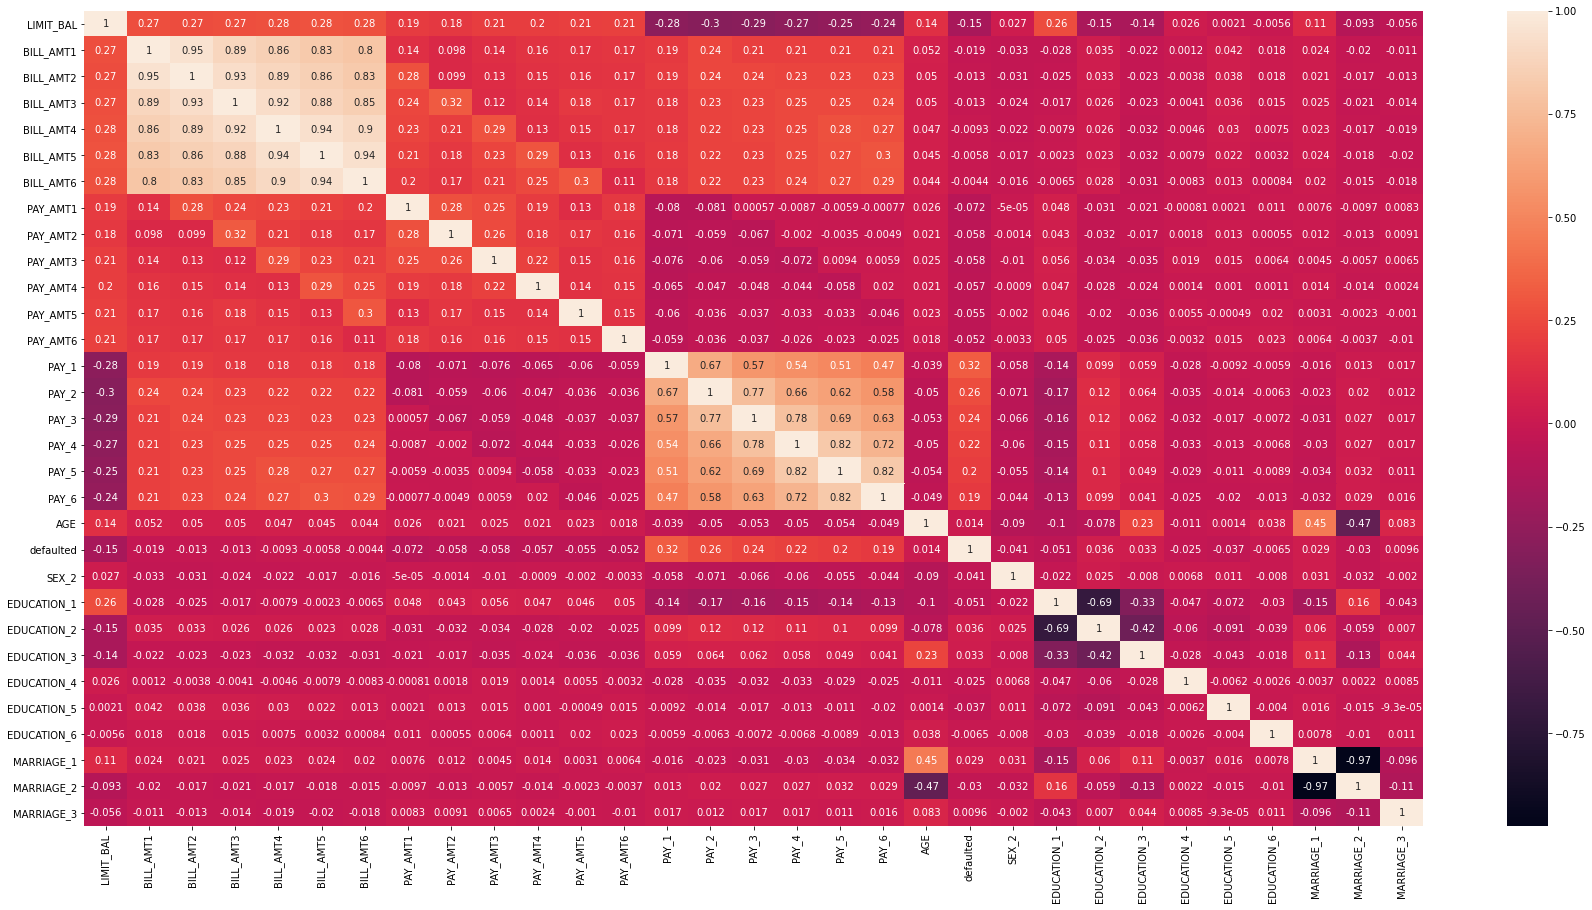

In [44]:
plt.figure(figsize = (30,15))
sns.heatmap(df4.corr(), annot = True )
plt.show()

In [ ]:
# The heatmap shows high correlation between the bill columns as high as (>0.95)
# also the columns associated with repayment status have moderate correlation (above 0.5)

##### Variance Inflation Factor (VIF)

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [45]:
# import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.tools as sm

In [46]:
# defining values for X and y

X = df4.drop("defaulted", axis =1)
y = df.defaulted

# add constant to X 
Xc = sm.add_constant(X)

vif_df = pd.DataFrame([vif(Xc.values, i) for i in range(Xc.shape[1])], index = Xc.columns, columns = ["VIF"])

In [47]:
vif_df.sort_values(by = "VIF")

,VIF
SEX_2,1.025901
PAY_AMT6,1.159277
AGE,1.388507
LIMIT_BAL,1.572922
PAY_AMT4,1.644208
PAY_AMT5,1.690507
PAY_AMT1,1.717267
PAY_AMT3,1.803588
PAY_1,1.919484
PAY_AMT2,2.259706


##### Inference:

1. The billing amounts and education are highly correlated.

#### 3. Using Chi-square to check best categorical feature 

The Chi-square test is used for categorical features in a dataset. 
We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores.

In [48]:
# import libraries
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [49]:
df4.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'AGE', 'defaulted', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [50]:
# define X and y 

X = df4[['SEX_2','EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']]
y = df4["defaulted"]

# fitting train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 5)

In [51]:
# retrival of f_score and p_val 

f_score, p_val = chi2(X_train, y_train)

In [52]:
# Dataframe of pvalues for significant columns

p_val1 = pd.DataFrame(p_val, index = X_train.columns, columns  = ["P_Val"])
p_val1.sort_values(by = "P_Val")

,P_Val
EDUCATION_1,4.471904e-08
EDUCATION_5,2.278176e-06
EDUCATION_3,7.718227e-06
EDUCATION_4,2.061331e-04
SEX_2,4.102076e-04
EDUCATION_2,1.852596e-03
MARRIAGE_1,3.347369e-03
MARRIAGE_2,5.606930e-03
MARRIAGE_3,1.588920e-01
EDUCATION_6,7.840404e-01


In [53]:
Signif_cat_ftrs = p_val1[p_val1["P_Val"] < 0.05].index
Signif_cat_ftrs
# 0.05 is alpha value/ Signifcance level

Index(['SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'MARRIAGE_1', 'MARRIAGE_2'],
      dtype='object')

#### Observation:

-- EDUCATION_1 is most significant column

#### 4. Using Fisher's Score

Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

#### 5. Using RFE on numerical columns

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of numerical features is reached.

In [60]:
# defining X and y
# fitting train test split

y = df4["defaulted"]
X = df4.drop([ 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',"defaulted"], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 5)

In [61]:
# fit logistic regression model

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [62]:
# fit RFE of model

rfe = RFE(logreg)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression())

In [63]:
# defining a set of values as a dictionary for hyperparameters
# fitting values to the GriddSearchCV model

param = {"n_features_to_select": range(df4.shape[1])}
g_search = GridSearchCV(rfe, param_grid= param, cv=3)
g_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RFE(estimator=LogisticRegression()),
             param_grid={'n_features_to_select': range(0, 31)})

In [64]:
#printing the best possible values to enhance model metrics

g_search.best_params_

{'n_features_to_select': 1}

In [65]:
# define anf fit and index the 

rfe = RFE(logreg, n_features_to_select =9)
rfe.fit(X_train, y_train)
rfe_df = pd.DataFrame(rfe.ranking_, index = X_train.columns, columns =["RFE"])

rfe_df[rfe_df["RFE"]==1].index

Index(['PAY_AMT1', 'PAY_AMT3', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'AGE'],
      dtype='object')

#### 6.Using Sequential Feature Selection

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d. The motivation behind feature selection algorithms is to automatically select a subset of features that is most relevant to the problem.The goal is that, We want to improve the computational efficiency and reduce the generalization error of the model by removing irrelevant features or noise. 

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [45]:
y = df4["defaulted"]
X = df4.drop("defaulted", axis =1)

model = LogisticRegression(random_state = 5)
model.fit(X,y)

LogisticRegression(random_state=5)

##### Forward Feature Selection

Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

In [46]:
sfs = SequentialFeatureSelector(model, k_features = "best", forward = True)
sfs.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=5),
                          k_features='best')

In [47]:
sfs.k_feature_names_

('PAY_1', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6')

##### Backward Feature Selection

Backward selection starts with all features contained in the dataset. It then runs a model and calculates a p-value associated with the t-test or F-test of the model for each feature. The feature with the largest insignificant p-value will then be removed from the model, and the process starts again.

In [48]:
# define the X and y and fit model

y = df4["defaulted"]
X = df4.drop("defaulted", axis = 1)

model = LogisticRegression(random_state = 10)
model.fit(X,y)

LogisticRegression(random_state=10)

In [49]:
bfs = SequentialFeatureSelector(model, k_features = 25, forward = False)
bfs.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=10),
                          forward=False, k_features=25)

In [50]:
# Obtain length and names of features to be selected
# print the features

len(bfs.k_feature_names_)

25

In [51]:
bfs_df = pd.DataFrame(bfs.k_feature_names_,  columns = ["Best_Features_by_BFS"])
bfs_df

,Best_Features_by_BFS
0,LIMIT_BAL
1,BILL_AMT1
2,BILL_AMT2
3,BILL_AMT3
4,BILL_AMT4
5,BILL_AMT5
6,BILL_AMT6
7,PAY_AMT1
8,PAY_AMT2
9,PAY_AMT3


In [52]:
##### New Feature after feature engineering:

df15 = df4[bfs_df['Best_Features_by_BFS'].values]

df4 = pd.concat([df15, df4["defaulted"]],1)


df4.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'AGE', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'defaulted'],
      dtype='object')

### Model Building 

The challenge of working with imbalanced datasets is that our target column is imbalanced.
while trying to resolve specific business challenge with imbalanced data set, the classifiers produced by standard machine learning algorithms might not give accurate results.
Hence we choose to use SMOTE technique.

In [ ]:
# model built considering features and without hyper parameter tuning.

##### Handling Imbalanced Target Column Using SMOTE

In [53]:
# define and fit the variables 
# Implement SMOTE technique
# apply train test split 

X = df4.drop("defaulted",1)
y = df4.defaulted

sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(x_sm ,y_sm , test_size= 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32544, 25)
(13948, 25)
(32544,)
(13948,)


#### 1. Logistic Regression

In [57]:
# build the Logistic Regression model
logmodel = LogisticRegression(random_state = 1)
logmodel.fit(X_train, y_train)


# 'y_pred' be the predicted values of y
y_pred = logmodel.predict(X_test)

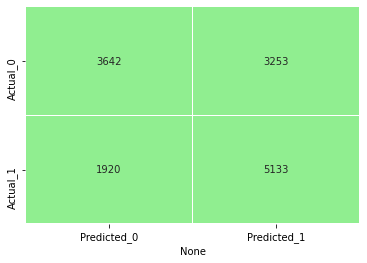

In [58]:
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()

cm = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(cm, index = ["Actual_0", "Actual_1"], columns = [["Predicted_0", "Predicted_1"]])
sns.heatmap(data = conf_mat , annot = True,cbar = False, cmap = ListedColormap(['LightGreen']), fmt= "d", linewidths = 0.1)
plt.show()

In [59]:
# calculate various performance measures

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.65      0.53      0.58      6895
           1       0.61      0.73      0.66      7053

    accuracy                           0.63     13948
   macro avg       0.63      0.63      0.62     13948
weighted avg       0.63      0.63      0.63     13948



### Inference
1. The Logistic regression model gives accuracy of 62% (as it considers both TP and TN it cannot be  important metrics)
2. True Negatives here is someone who is not making a default while we are looking for a customer making default.
3. Therefore the metrics we should consider will be Precision or Recall
4. precision = TP/(TP+FP)
5. recall = TP/(TP+FN)
6. precision = 0.64, recall = 0.56 which is not good value of metric.

#### 2. Decision Tree Classification

In [88]:
# build the Logistic Regression model
model_df = DecisionTreeClassifier# build the Decision Tree Classifier model
model_dt = DecisionTreeClassifier(random_state = 1)
model_dt.fit(X_train, y_train)

# 'y_pred_dt' be the predicted values of y
y_pred_dt = model_dt.predict(X_test)

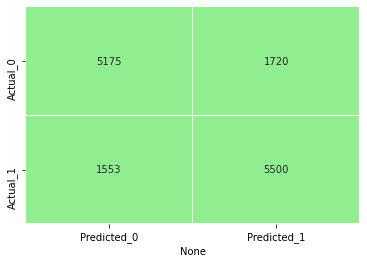

In [89]:
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()

cm = confusion_matrix(y_test, y_pred_dt)
conf_mat = pd.DataFrame(cm, index = ["Actual_0", "Actual_1"], columns = [["Predicted_0", "Predicted_1"]])
sns.heatmap(data = conf_mat , annot = True,cbar = False, cmap = ListedColormap(['LightGreen']), fmt= "d", linewidths = 0.1)
plt.show()

In [62]:
# calculate various performance measures

cr = classification_report(y_test, y_pred_dt)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6895
           1       0.76      0.78      0.77      7053

    accuracy                           0.77     13948
   macro avg       0.77      0.77      0.77     13948
weighted avg       0.77      0.77      0.77     13948



### Inference
1. The Decision Tree model gives better results when compared with Logistic regression.
* If a default (Actual Positive) is predicted as non-default (Predicted Negative),  
* the consequence can be very bad for the bank.
2. Here 1559 were wrongly predicted as default while 1445 were predicted as non default who were actually defaulters.
3. Therefore the metrics we should consider will be Precision or Recall
4. precision = TP/(TP+FP) 
5. recall = TP/(TP+FN)
6. precision = 0.78, recall = 0.80
7. Hence we can say that the Decision Tree Metrics are better predictors of default.

#### 3. K Nearest Neighbour (KNN) Model

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
# initialize the scaler
mm = MinMaxScaler()

# fit to scale numerical columns
X_scale = mm.fit_transform(x_sm)

In [65]:
### Train Test Split

In [66]:
# split data into train subset and test subset

xtrain, xtest, ytrain, ytest = train_test_split(X_scale, y_sm, random_state=5, test_size=0.3)

In [91]:
# build the kNighbour Classifier model
model_knn = KNeighborsClassifier()
model_knn.fit(xtrain, ytrain)

# 'y_pred_knn' be the predicted values of y
y_pred_knn = model_knn.predict(xtest)

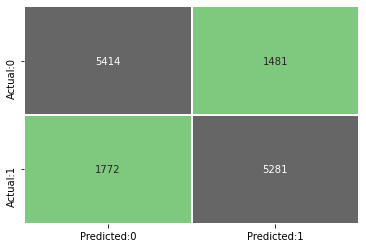

In [92]:
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()

conf_mat = confusion_matrix(ytest, y_pred_knn)
conf_mat_knn = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_knn, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [93]:
# calculate various performance measures

cr = classification_report(y_test, y_pred_knn)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      6895
           1       0.78      0.75      0.76      7053

    accuracy                           0.77     13948
   macro avg       0.77      0.77      0.77     13948
weighted avg       0.77      0.77      0.77     13948



### Inference
1. The K-Nearest Neighbours model 
* If a default (Actual Positive) is predicted as non-default (Predicted Negative), the consequence can cause loss for the bank.
2. Here 943 were wrongly predicted as default while 1596 were predicted as non default who were actually defaulters.
3. Therefore the metrics we should consider will be Precision or Recall
4. precision = TP/(TP+FP) = 0.85
5. recall = TP/(TP+FN) = 0.77
6. We can say knn is a good predictor of the defaulters.

#### 4. Random Forest Classifier

In [94]:
# build the Random Forest Classifier model
model_rf = RandomForestClassifier(random_state = 1)
model_rf.fit(X_train, y_train)

# 'y_pred_rf' be the predicted values of y
y_pred_rf = model_rf.predict(X_test)

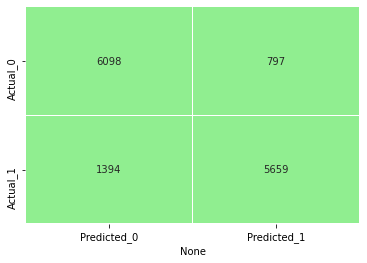

In [95]:
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()

cm = confusion_matrix(y_test, y_pred_rf)
conf_mat_rf = pd.DataFrame(cm, index = ["Actual_0", "Actual_1"], columns = [["Predicted_0", "Predicted_1"]])
sns.heatmap(data = conf_mat_rf , annot = True,cbar = False, cmap = ListedColormap(['LightGreen']), fmt= "d", linewidths = 0.1)
plt.show()

In [96]:
# calculate various performance measures

cr = classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      6895
           1       0.88      0.80      0.84      7053

    accuracy                           0.84     13948
   macro avg       0.85      0.84      0.84     13948
weighted avg       0.85      0.84      0.84     13948



### Inference
1. The Random Forest model gives better results when compared with Logistic regression.
* If a default (Actual Positive) is predicted as non-default (Predicted Negative),  
* the consequence can be very bad for the bank.
2. Here 667 were wrongly predicted as default while 1224 were predicted as non default who were actually defaulters.
3. Therefore the metrics we should consider will be Precision or Recall
4. precision = TP/(TP+FP) = 0.90
5. recall = TP/(TP+FN) = 0.83
6. As the precision and recall metrics are good. we can infer that the model is better predictor of default.

#### 5. Naive Bayes Classifier

In [98]:
# build the Naive Bayes Classifier model

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# 'y_pred_rf' be the predicted values of y
y_pred_nb =  model_nb.predict(X_test)

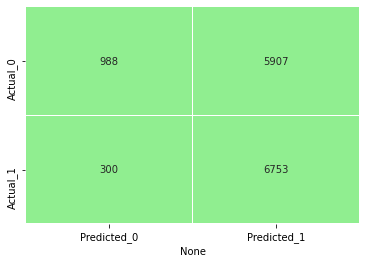

In [99]:
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()

cm = confusion_matrix(y_test, y_pred_nb)
conf_mat_nb = pd.DataFrame(cm, index = ["Actual_0", "Actual_1"], columns = [["Predicted_0", "Predicted_1"]])
sns.heatmap(data = conf_mat_nb , annot = True,cbar = False, cmap = ListedColormap(['LightGreen']), fmt= "d", linewidths = 0.1)
plt.show()

In [75]:
# calculate various performance measures

cr = classification_report(y_test, y_pred_nb)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.14      0.24      6895
           1       0.53      0.96      0.69      7053

    accuracy                           0.55     13948
   macro avg       0.65      0.55      0.46     13948
weighted avg       0.65      0.55      0.47     13948



### Inference
1. Naive Bayes model for prediction of default.
* If a default (Actual Positive) is predicted as non-default (Predicted Negative), the consequence can be very bad for the bank.
2. Here 5771 were wrongly predicted as default while 440 were predicted as non default who were actually defaulters.
3. Therefore the number of wrongly predicted customers is very low in this case yet there is a huge elevation with customers who are wrongly classified as default.
4. precision = TP/(TP+FP) = 0.53
5. recall = TP/(TP+FN) = 0.94
6. As the precision and recall metrics are good. we can infer that the model is better predictor of default.

#### 6. XG Boost Classifier

In [100]:
# build the XG Boost Classifier model
model_xgb = XGBClassifier(random_state = 1)
model_xgb.fit(X_train, y_train)

# 'y_pred_xgb' be the predicted values of y
y_pred_xgb =model_xgb.predict(X_test)

[21:51:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


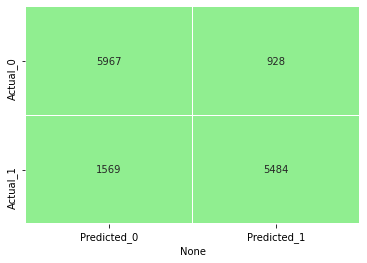

In [101]:
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()

cm = confusion_matrix(y_test, y_pred_xgb)
conf_mat_xgb = pd.DataFrame(cm, index = ["Actual_0", "Actual_1"], columns = [["Predicted_0", "Predicted_1"]])
sns.heatmap(data = conf_mat_xgb , annot = True,cbar = False, cmap = ListedColormap(['LightGreen']), fmt= "d", linewidths = 0.1)
plt.show()

In [102]:
# calculate various performance measures

cr = classification_report(y_test, y_pred_xgb)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      6895
           1       0.86      0.78      0.81      7053

    accuracy                           0.82     13948
   macro avg       0.82      0.82      0.82     13948
weighted avg       0.82      0.82      0.82     13948



### Inference
1. XG Boost model for prediction of default.
* If a default (Actual Positive) is predicted as non-default (Predicted Negative), the consequence can be very bad for the bank.
2. Here 607 were wrongly predicted as default while 1747 were predicted as non default who were actually defaulters.
3. Therefore the number of wrongly predicted customers is very low.
5. precision =  TP/(TP+FP)= 0.90, recall = TP/(TP+FN) = 0.79
6. As the precision and recall metrics are good. we can infer that the model is better predictor of default.

#### 7. Adaboost Using Decision Tree

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
# define and fit Ada Boost classifier model

model_adb = AdaBoostClassifier(n_estimators=50, random_state = 1) 
model_adb.fit(X_train, y_train)

y_pred_adb = model_adb.predict(X_test)

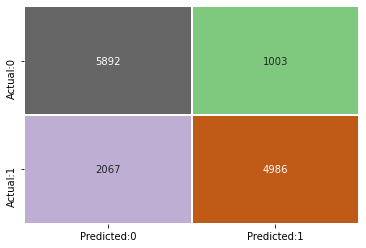

In [104]:
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()

conf_mat = confusion_matrix(y_test, y_pred_adb)
conf_mat_df = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_df, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [105]:
# calculate various performance measures

cr = classification_report(y_test, y_pred_adb)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6895
           1       0.83      0.71      0.76      7053

    accuracy                           0.78     13948
   macro avg       0.79      0.78      0.78     13948
weighted avg       0.79      0.78      0.78     13948



### Inference
1. Ada Boost model for prediction of default.
* If a default (Actual Positive) is predicted as non-default (Predicted Negative), the consequence can be very bad for the bank.
2. Here 750 were wrongly predicted as default while 1720 were predicted as non default who were actually defaulters.
3. Therefore the number of wrongly predicted customers is very low.
5. precision =  TP/(TP+FP)= 0.88, recall = TP/(TP+FN) = 0.76
6. As the precision and recall metrics are good. we can infer that the model is good predictor of default.

In [106]:
# Comparing the metrics for different models

roc  =  roc_auc_score(y_test, y_pred)
acc  =  accuracy_score(y_test, y_pred)
prec =  precision_score(y_test, y_pred)
rec  =  recall_score(y_test, y_pred)
f1   =  f1_score(y_test, y_pred)

roc_dt  =  roc_auc_score(y_test, y_pred_dt)
acc_dt  =  accuracy_score(y_test, y_pred_dt)
prec_dt =  precision_score(y_test, y_pred_dt)
rec_dt  =  recall_score(y_test, y_pred_dt)
f1_dt   =  f1_score(y_test, y_pred_dt)

roc_knn  =  roc_auc_score(y_test, y_pred_knn)
acc_knn  =  accuracy_score(y_test, y_pred_knn)
prec_knn =  precision_score(y_test, y_pred_knn)
rec_knn  =  recall_score(y_test, y_pred_knn)
f1_knn   =  f1_score(y_test, y_pred_knn)

roc_rf  =  roc_auc_score(y_test, y_pred_rf)
acc_rf  =  accuracy_score(y_test, y_pred_rf)
prec_rf =  precision_score(y_test, y_pred_rf)
rec_rf  =  recall_score(y_test, y_pred_rf)
f1_rf   =  f1_score(y_test, y_pred_rf)

roc_nb  =  roc_auc_score(y_test, y_pred_nb)
acc_nb  =  accuracy_score(y_test, y_pred_nb)
prec_nb =  precision_score(y_test, y_pred_nb)
rec_nb  =  recall_score(y_test, y_pred_nb)
f1_nb   =  f1_score(y_test, y_pred_nb)

roc_xgb  =  roc_auc_score(y_test, y_pred_xgb)
acc_xgb  =  accuracy_score(y_test, y_pred_xgb)
prec_xgb =  precision_score(y_test, y_pred_xgb)
rec_xgb  =  recall_score(y_test, y_pred_xgb)
f1_xgb   =  f1_score(y_test, y_pred_xgb)

roc_adb  =  roc_auc_score(y_test, y_pred_adb)
acc_adb  =  accuracy_score(y_test, y_pred_adb)
prec_adb =  precision_score(y_test, y_pred_adb)
rec_adb  =  recall_score(y_test, y_pred_adb)
f1_adb   =  f1_score(y_test, y_pred_adb)


model= pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, roc],
                     ['Decision Tree Classifier', acc_dt, prec_dt, rec_dt, f1_dt, roc_dt],
                     ['K-Nearest Neighbours ', acc_knn, prec_knn, rec_knn, f1_knn, roc_knn],
                     ['Random Forest Classifier', acc_rf, prec_rf, rec_rf, f1_rf, roc_rf],
                     ['Naive Bayes Classifier', acc_nb, prec_nb, rec_nb, f1_nb, roc_nb],
                     ['XG Boost Classifier', acc_xgb, prec_xgb, rec_xgb, f1_xgb, roc_xgb],
                     ['AdaBoost Classifier', acc_adb, prec_adb, rec_adb, f1_adb, roc_adb]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,Logistic Regression,0.629122,0.612092,0.727775,0.664939,0.627992
1,Decision Tree Classifier,0.765343,0.761773,0.779810,0.770686,0.765177
2,K-Nearest Neighbours,0.766777,0.780982,0.748759,0.764531,0.766983
3,Random Forest Classifier,0.842917,0.876549,0.802354,0.837812,0.843381
4,Naive Bayes Classifier,0.554990,0.533412,0.957465,0.685132,0.550379
5,XG Boost Classifier,0.820978,0.855271,0.777541,0.814556,0.821476
6,AdaBoost Classifier,0.779897,0.832526,0.706933,0.764607,0.780733


#### Interpretation:


1. After checking the Evaluation Metrics based on positive class(default)

-- we select 3 models

    -- Decision Tree Classifier
    
    -- Random Forest Classifier
    
    -- XG Boost Classifier

### Feature Extraction

-- In above column infers that, there is credit risk associated with the customer, who's outstanding balance exceeds limit balance.

-- If ratio of the above created column "OSTBILL_VS_LIMIT_BAL" exceeds 1, it means the customer is using above the credit limit. Hence customer could be defaulter.


In [107]:
# extracting feature - OSTBILL_VS_LIMIT_BAL

df4['OSTBILL_VS_LIMIT_BAL'] = df3['BILL_AMT1']/df3['LIMIT_BAL']
df4['OSTBILL_VS_LIMIT_BAL'].describe()

count    29870.000000
mean         0.424432
std          0.411718
min         -0.619892
25%          0.022050
50%          0.315862
75%          0.831225
max          6.455300
Name: OSTBILL_VS_LIMIT_BAL, dtype: float64

In [108]:
# ovservations

df4["OSTBILL_VS_LIMIT_BAL"].head(5)

ID
1    0.195650
2    0.022350
3    0.324878
4    0.939800
5    0.172340
Name: OSTBILL_VS_LIMIT_BAL, dtype: float64

#### Inference:

1. In above column infers that, there is credit risk associated with the customer, who's outstanding balance exceeds limit balance.

2. If ratio of the above created column "OSTBILL_VS_LIMIT_BAL" exceeds 1, it means the customer is using above the credit limit. Hence customer could be defaulter.

#### Checking Importance of Feature for our model

In [109]:
# value counts  of target column

y.value_counts()

0    23246
1     6624
Name: defaulted, dtype: int64

##### Handling Imbalanced Target Column Using SMOTE

In [110]:
# define and fit the variables 
# Implement SMOTE technique
# split the data using train test split 

X = df4.drop("defaulted",1)
y = df4.defaulted

sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size= 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32544, 26)
(13948, 26)
(32544,)
(13948,)


### 1.1 Decision tree

In [111]:
# define and fit Decision tree classifier model

dt = DecisionTreeClassifier(random_state = 1)
model_dt = DecisionTreeClassifier(random_state=5)

model_dt.fit(X_train, y_train)
y_pred_dt1 = model_dt.predict(X_test)

#### Evaluation metrics

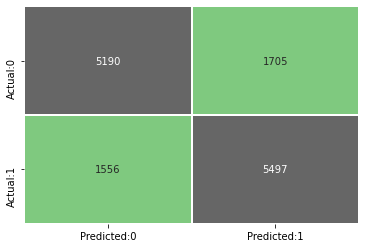

In [112]:
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()

conf_mat = confusion_matrix(y_test, y_pred_dt1)
conf_mat_df = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_df, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [113]:
# calculate various performance measures

cr = classification_report(y_test, y_pred_dt1)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6895
           1       0.76      0.78      0.77      7053

    accuracy                           0.77     13948
   macro avg       0.77      0.77      0.77     13948
weighted avg       0.77      0.77      0.77     13948



In [114]:
# metrics for evaluating classifier performance

roc_dt1  =  roc_auc_score(y_test, y_pred_dt1)
acc_dt1  =  accuracy_score(y_test, y_pred_dt1)
prec_dt1 =  precision_score(y_test, y_pred_dt1)
rec_dt1  =  recall_score(y_test, y_pred_dt1)
f1_dt1   =  f1_score(y_test, y_pred_dt1)


model= pd.DataFrame([['Decision Tree Classifier with feature', acc_dt1, prec_dt1, rec_dt1, f1_dt1, roc_dt1]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,Decision Tree Classifier with feature,0.766203,0.76326,0.779385,0.771238,0.766052


### Inference
1. Decision Tree Model with extracted feature (Outstanding Bill vs Limit Balance)
2. The model is slightly better than the base model.

### 1.2 -  XG BOOST

In [115]:
# define and fit XG Boost classifier model

model_xgb = XGBClassifier(random_state = 1)
model_xgb.fit(X_train, y_train)

y_pred_xgb1 =model_xgb.predict(X_test)

[22:01:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


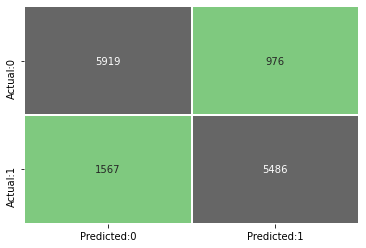

In [116]:
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()

conf_mat = confusion_matrix(y_test, y_pred_xgb1)
conf_mat_xgb = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_xgb, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [117]:
# calculate various performance measures

cr = classification_report(y_test, y_pred_xgb1)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      6895
           1       0.85      0.78      0.81      7053

    accuracy                           0.82     13948
   macro avg       0.82      0.82      0.82     13948
weighted avg       0.82      0.82      0.82     13948



In [118]:
# metrics for evaluating classifier performance

roc_xgb1  =  roc_auc_score(y_test, y_pred_xgb1)
acc_xgb1  =  accuracy_score(y_test, y_pred_xgb1)
prec_xgb1 =  precision_score(y_test, y_pred_xgb1)
rec_xgb1  =  recall_score(y_test, y_pred_xgb1)
f1_xgb1   =  f1_score(y_test, y_pred_xgb1)


model= pd.DataFrame([['XG Boost Classifier with feature', acc_xgb1, prec_xgb1, rec_xgb1, f1_xgb1, roc_xgb1]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,XG Boost Classifier with feature,0.81768,0.848963,0.777825,0.811839,0.818137


### 1.3 RandomForestClassifier

In [119]:
# define and fit  Random Forest classifier model

model_rf = RandomForestClassifier(random_state = 1)
model_rf.fit(X_train, y_train)

y_pred_rf1 = model_rf.predict(X_test)

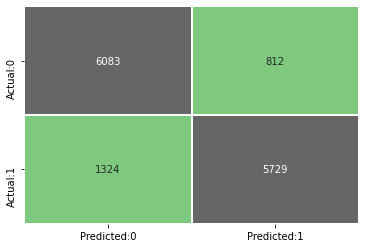

In [120]:
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()

conf_mat = confusion_matrix(y_test, y_pred_rf1)
conf_mat_rf = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_rf, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [121]:
# calculate various performance measures

cr = classification_report(y_test, y_pred_rf1)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      6895
           1       0.88      0.81      0.84      7053

    accuracy                           0.85     13948
   macro avg       0.85      0.85      0.85     13948
weighted avg       0.85      0.85      0.85     13948



In [122]:
# metrics for evaluating classifier performance

roc_rf1  =  roc_auc_score(y_test, y_pred_rf1)
acc_rf1  =  accuracy_score(y_test, y_pred_rf1)
prec_rf1 =  precision_score(y_test, y_pred_rf1)
rec_rf1  =  recall_score(y_test, y_pred_rf1)
f1_rf1   =  f1_score(y_test, y_pred_rf1)


model= pd.DataFrame([['Random Forest Classifier with feature', acc_rf1, prec_rf1, rec_rf1, f1_rf1, roc_rf1]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,Random Forest Classifier with feature,0.84686,0.87586,0.812278,0.842872,0.847256


### Inference
1. This feature is contributing towards the data when compared with models.
2. Decision Tree Model with extracted feature (Outstanding Bill vs Limit Balance)
3. The model is slightly better than the base model.


In [124]:
df4.columns, df4.shape

(Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
        'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
        'AGE', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'EDUCATION_6',
        'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'defaulted',
        'OSTBILL_VS_LIMIT_BAL'],
       dtype='object'),
 (29870, 27))

### 2. Comparing Outstanding balanace with Previous 5 months average Bill amount

-- In the new column "Ost_VS_PrevAvgBill" we can interpret, If customer is not following previous trend for outstanding Bill amount or customer's outstanding bill amount is higher than the previous average bill amount, than the customer is likely to default.

-- if value of column "Ost_VS_PrevAvgBill" is more than 1, it means customer is expending more than previous average bill amount.


#### Prev_avg_bill means previous 5 month average outstanding amount

In [125]:
# Calculations

df4['Prev_avg_bill'] = (df3["BILL_AMT2"] + df3["BILL_AMT3"] + df3["BILL_AMT4"] + df3["BILL_AMT5"] + df3["BILL_AMT6"]) / 5

In [126]:
df4["BILL_AMT1"] = df4["BILL_AMT1"].replace(0,1)
df4['Prev_avg_bill'] = df4['Prev_avg_bill'].replace(0,1)

In [127]:
# Extracted feature - Out standing vs Previous average bill

df4["Ost_VS_PrevAvgBill"] = df4["BILL_AMT1"]/df4['Prev_avg_bill']

In [128]:
# five point summary of extracted feature

df4["Ost_VS_PrevAvgBill"].describe()

count     29870.000000
mean        263.199494
std        4918.728745
min      -33597.000000
25%           0.833333
50%           1.013771
75%           1.464851
max      234589.000000
Name: Ost_VS_PrevAvgBill, dtype: float64

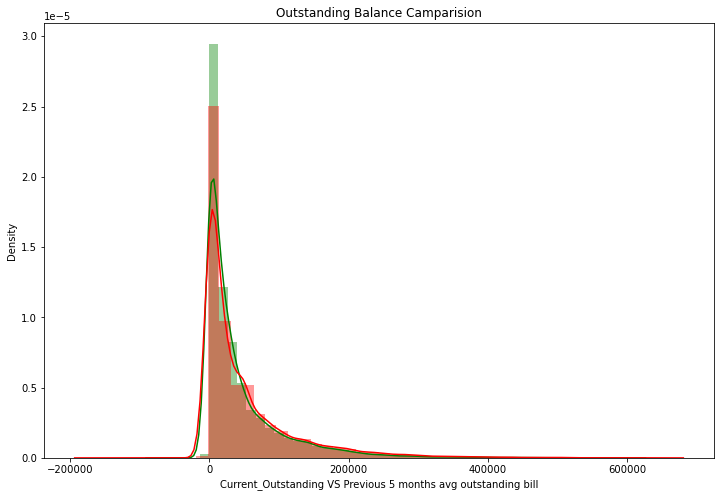

In [129]:
# plot showing the comparision of outstanding and previous month balance 

plt.figure(figsize = (12,8))
sns.distplot(df4["Prev_avg_bill"], color = "green")
sns.distplot(df4["BILL_AMT1"], color = "red")
plt.title("Outstanding Balance Camparision")
plt.xlabel("Current_Outstanding VS Previous 5 months avg outstanding bill")
plt.show()

#### Inference : 
     
1. By Visualizing the Graph: Value counts for both current outstanding balance and previous 5 months average outstanding balance are maximum at zero. 

2. In the new column "Ost_VS_PrevAvgBill" we can interpret, If customer is not following previous trend for outstanding Bill amount or customer's outstanding bill amount is higher than the previous average bill amount, than the customer is likely to default.

3. if value of column "Ost_VS_PrevAvgBill" is more than 1, it means customer is expending more than previous average bill amount.

In [130]:
df4.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'AGE', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'defaulted',
       'OSTBILL_VS_LIMIT_BAL', 'Prev_avg_bill', 'Ost_VS_PrevAvgBill'],
      dtype='object')

#### Checking Importance of Feature for our model

In [131]:
# define and fit the variables 
# Implement SMOTE technique
# split the data using train test split 

X = df4.drop(["defaulted", "Prev_avg_bill", "OSTBILL_VS_LIMIT_BAL"],1)
y = df4.defaulted

sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(x_sm ,y_sm , test_size= 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32544, 26)
(13948, 26)
(32544,)
(13948,)


### 2.1 Decision tree

In [89]:
# define and fit Decision Tree classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [133]:
model_dt = DecisionTreeClassifier(random_state = 5)
model_dt.fit(X_train, y_train)

y_pred_dt2 = model_dt.predict(X_test)

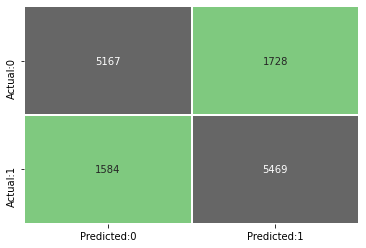

In [134]:
conf_mat = confusion_matrix(y_test, y_pred_dt2)
conf_mat_df2 = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_df2, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [135]:
cr = classification_report(y_test, y_pred_dt2)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6895
           1       0.76      0.78      0.77      7053

    accuracy                           0.76     13948
   macro avg       0.76      0.76      0.76     13948
weighted avg       0.76      0.76      0.76     13948



In [136]:
roc_dt2  =  roc_auc_score(y_test, y_pred_dt2)
acc_dt2  =  accuracy_score(y_test, y_pred_dt2)
prec_dt2 =  precision_score(y_test, y_pred_dt2)
rec_dt2  =  recall_score(y_test, y_pred_dt2)
f1_dt2   =  f1_score(y_test, y_pred_dt2)


model= pd.DataFrame([['Decision Tree Classifier with feature', acc_dt2, prec_dt2, rec_dt2, f1_dt2, roc_dt2]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,Decision Tree Classifier with feature,0.762547,0.7599,0.775415,0.767579,0.762399


### 2.2 XG BOOST

In [94]:
# define and fit XG Boost classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [137]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state = 1)
model_xgb.fit(X_train, y_train)

y_pred_xgb2 =model_xgb.predict(X_test)

[22:23:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


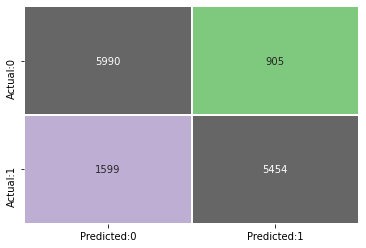

In [138]:
conf_mat = confusion_matrix(y_test, y_pred_xgb2)

conf_mat_xgb2 = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_xgb2, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [139]:
cr = classification_report(y_test, y_pred_xgb2)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      6895
           1       0.86      0.77      0.81      7053

    accuracy                           0.82     13948
   macro avg       0.82      0.82      0.82     13948
weighted avg       0.82      0.82      0.82     13948



In [140]:
roc_xgb2  =  roc_auc_score(y_test, y_pred_xgb2)
acc_xgb2  =  accuracy_score(y_test, y_pred_xgb2)
prec_xgb2 =  precision_score(y_test, y_pred_xgb2)
rec_xgb2  =  recall_score(y_test, y_pred_xgb2)
f1_xgb2   =  f1_score(y_test, y_pred_xgb2)


model= pd.DataFrame([['XG Boost Classifier with feature', acc_xgb2, prec_xgb2, rec_xgb2, f1_xgb2, roc_xgb2]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,XG Boost Classifier with feature,0.820476,0.857682,0.773288,0.813302,0.821017


### 2.3 Random Forest Classifier

In [99]:
# define and fit Random Forest classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [141]:
model_rf = RandomForestClassifier(random_state = 1)

model_rf.fit(X_train, y_train)

y_pred_rf2 = model_rf.predict(X_test)

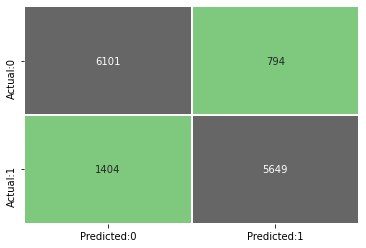

In [142]:
conf_mat = confusion_matrix(y_test, y_pred_rf2)

conf_mat_rf2 = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_rf2, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [143]:
cr = classification_report(y_test, y_pred_rf2)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      6895
           1       0.88      0.80      0.84      7053

    accuracy                           0.84     13948
   macro avg       0.84      0.84      0.84     13948
weighted avg       0.85      0.84      0.84     13948



In [144]:
roc_rf2  =  roc_auc_score(y_test, y_pred_rf2)
acc_rf2  =  accuracy_score(y_test, y_pred_rf2)
prec_rf2 =  precision_score(y_test, y_pred_rf2)
rec_rf2  =  recall_score(y_test, y_pred_rf2)
f1_rf2   =  f1_score(y_test, y_pred_rf2)


model= pd.DataFrame([['Rondom Forest Classifier with feature', acc_rf2, prec_rf2, rec_rf2, f1_rf2, roc_rf2]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,Rondom Forest Classifier with feature,0.842415,0.876765,0.800936,0.837137,0.84289


### Inference
1. This feature is contributing towards the data when compared with models.

In [145]:
df4.columns, df4.shape

(Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
        'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
        'AGE', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'EDUCATION_6',
        'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'defaulted',
        'OSTBILL_VS_LIMIT_BAL', 'Prev_avg_bill', 'Ost_VS_PrevAvgBill'],
       dtype='object'),
 (29870, 29))

### 3.  Six Months and Three Months Average Bill Amount

In [104]:
# 3 month average bill amount

In [146]:
# Extracted Feature -  3 month Average bill
df4["Bill_3months_avg"] = (df3["BILL_AMT1"]+df3["BILL_AMT2"]+df3["BILL_AMT3"])/3

In [147]:
df4["Bill_3months_avg"].describe()

count     29870.000000
mean      48635.899297
std       68130.454051
min      -47043.000000
25%        4455.083333
50%       22238.000000
75%       63466.083333
max      671417.333333
Name: Bill_3months_avg, dtype: float64

In [148]:
df4.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'AGE', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'defaulted',
       'OSTBILL_VS_LIMIT_BAL', 'Prev_avg_bill', 'Ost_VS_PrevAvgBill',
       'Bill_3months_avg'],
      dtype='object')

#### Checking feature "Bill_3months_avg" importance for our model

In [149]:
df4 = df4.drop("Prev_avg_bill", 1)

In [150]:
X = df4.drop(["Ost_VS_PrevAvgBill", "OSTBILL_VS_LIMIT_BAL", "defaulted"],1)

y = df4.defaulted

sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(x_sm ,y_sm , test_size= 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32544, 26)
(13948, 26)
(32544,)
(13948,)


### 3.1.1 Decision Tree

In [151]:
# define and fit Decision Tree classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [157]:
model_dt = DecisionTreeClassifier(random_state = 1)
model_dt.fit(X_train, y_train)

y_pred_dt3 = model_dt.predict(X_test)

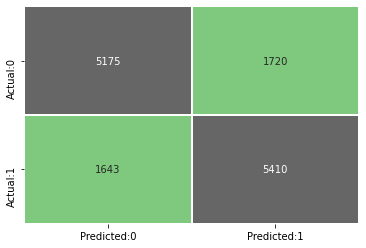

In [158]:
conf_mat = confusion_matrix(y_test, y_pred_dt3)
conf_mat_df3 = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_df3, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [159]:
cr = classification_report(y_test, y_pred_dt3)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      6895
           1       0.76      0.77      0.76      7053

    accuracy                           0.76     13948
   macro avg       0.76      0.76      0.76     13948
weighted avg       0.76      0.76      0.76     13948



In [160]:

roc_dt3  =  roc_auc_score(y_test, y_pred_dt3)
acc_dt3  =  accuracy_score(y_test, y_pred_dt3)
prec_dt3 =  precision_score(y_test, y_pred_dt3)
rec_dt3  =  recall_score(y_test, y_pred_dt3)
f1_dt3   =  f1_score(y_test, y_pred_dt3)


model= pd.DataFrame([
                     ['Decision Tree Classifier with feature', acc_dt3, prec_dt3, rec_dt3, f1_dt3, roc_dt3]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,Decision Tree Classifier with feature,0.75889,0.758766,0.767049,0.762885,0.758797


### 3.1.2 XG Boost

In [115]:
# define and fit XG Boost classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [162]:
model_xgb = XGBClassifier(random_state = 1)
model_xgb.fit(X_train, y_train)

y_pred_xgb3 =model_xgb.predict(X_test)

[22:40:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


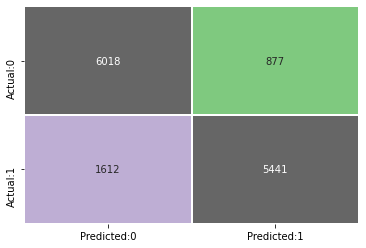

In [164]:
conf_mat = confusion_matrix(y_test, y_pred_xgb3)

conf_mat_df = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_df, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [165]:
cr = classification_report(y_test, y_pred_xgb3)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      6895
           1       0.86      0.77      0.81      7053

    accuracy                           0.82     13948
   macro avg       0.82      0.82      0.82     13948
weighted avg       0.83      0.82      0.82     13948



In [166]:
roc_xgb3  =  roc_auc_score(y_test, y_pred_xgb3)
acc_xgb3  =  accuracy_score(y_test, y_pred_xgb3)
prec_xgb3 =  precision_score(y_test, y_pred_xgb3)
rec_xgb3  =  recall_score(y_test, y_pred_xgb3)
f1_xgb3   =  f1_score(y_test, y_pred_xgb3)


model= pd.DataFrame([
                     ['XG Boost Classifier with feature', acc_xgb3, prec_xgb3, rec_xgb3, f1_xgb3, roc_xgb3]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,XG Boost Classifier with feature,0.821551,0.86119,0.771445,0.813851,0.822126


### 3.1.3 Random Forest Classifier

In [167]:
# define and fit Random Forest classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [173]:
model_rf = RandomForestClassifier(random_state = 1)
model_rf.fit(X_train, y_train)

y_pred_rf3 = model_rf.predict(X_test)

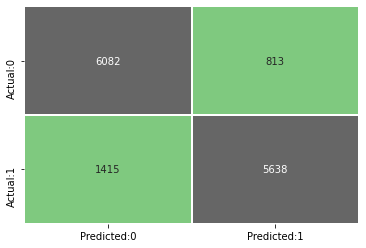

In [174]:
conf_mat = confusion_matrix(y_test, y_pred_rf3)
conf_mat_rf3 = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_rf3, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [175]:
cr = classification_report(y_test, y_pred_rf3)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      6895
           1       0.87      0.80      0.84      7053

    accuracy                           0.84     13948
   macro avg       0.84      0.84      0.84     13948
weighted avg       0.84      0.84      0.84     13948



In [176]:
roc_rf3  =  roc_auc_score(y_test, y_pred_rf3)
acc_rf3  =  accuracy_score(y_test, y_pred_rf3)
prec_rf3 =  precision_score(y_test, y_pred_rf3)
rec_rf3  =  recall_score(y_test, y_pred_rf3)
f1_rf3   =  f1_score(y_test, y_pred_rf3)


model= pd.DataFrame([
                     ['Random Forest Classifier with feature', acc_rf3, prec_rf3, rec_rf3, f1_rf2, roc_rf2]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,Random Forest Classifier with feature,0.840264,0.873973,0.799376,0.837137,0.84289


In [125]:
# this feature is not contributing towards better performance of model.

#### Checking feature "Bill_6months_avg" importance for our model

In [126]:
# 6 month average bill amount

In [177]:
# Extracted feature - Bill_6months_avg

df4["Bill_6months_avg"] = (df3["BILL_AMT1"]+df3["BILL_AMT2"]+df3["BILL_AMT3"] + df3["BILL_AMT4"] + df3["BILL_AMT5"] + df3["BILL_AMT6"])/6

In [178]:
df4["Bill_6months_avg"].describe()

count     29870.000000
mean      44492.839399
std       61859.813899
min      -56043.166667
25%        4757.083333
50%       20950.500000
75%       56784.416667
max      592431.833333
Name: Bill_6months_avg, dtype: float64

In [179]:
df4.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'AGE', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'defaulted',
       'OSTBILL_VS_LIMIT_BAL', 'Ost_VS_PrevAvgBill', 'Bill_3months_avg',
       'Bill_6months_avg'],
      dtype='object')

In [180]:
X = df4.drop(["Bill_3months_avg", "Ost_VS_PrevAvgBill", "OSTBILL_VS_LIMIT_BAL", "defaulted"],1)
y = df4.defaulted

sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(x_sm ,y_sm , test_size= 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32544, 26)
(13948, 26)
(32544,)
(13948,)


### 3.2.1. Decision Tree

In [181]:
# define and fit Decision Tree classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [183]:
model_dt = DecisionTreeClassifier(random_state = 1)
model_dt.fit(X_train, y_train)

y_pred_dt4 = model_dt.predict(X_test)

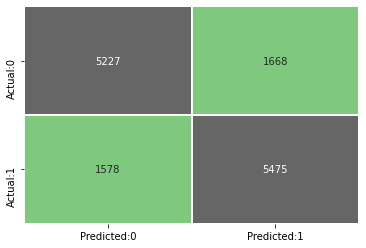

In [184]:
conf_mat = confusion_matrix(y_test, y_pred_dt4)
conf_mat_df = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_df, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [185]:
cr = classification_report(y_test, y_pred_dt4)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      6895
           1       0.77      0.78      0.77      7053

    accuracy                           0.77     13948
   macro avg       0.77      0.77      0.77     13948
weighted avg       0.77      0.77      0.77     13948



In [186]:
roc_dt4  =  roc_auc_score(y_test, y_pred_dt4)
acc_dt4  =  accuracy_score(y_test, y_pred_dt4)
prec_dt4 =  precision_score(y_test, y_pred_dt4)
rec_dt4  =  recall_score(y_test, y_pred_dt4)
f1_dt4   =  f1_score(y_test, y_pred_dt4)


model= pd.DataFrame([['Decision Tree Classifier with feature', acc_dt4, prec_dt4, rec_dt4, f1_dt4, roc_dt4]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,Decision Tree Classifier with feature,0.767278,0.766485,0.776265,0.771344,0.767175


### 3.2.2. XG Boost

In [187]:
# define and fit XG Boost classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [188]:
model_xgb = XGBClassifier(random_state = 1)
model_xgb.fit(X_train, y_train)

y_pred_xgb4 =model_xgb.predict(X_test)

[22:45:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


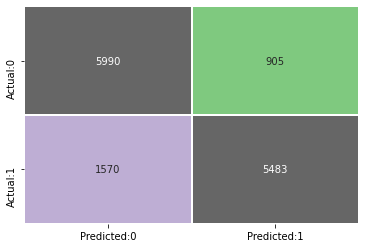

In [189]:
conf_mat = confusion_matrix(y_test, y_pred_xgb4)

conf_mat_xgb4 = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_xgb4, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [190]:
cr = classification_report(y_test, y_pred_xgb4)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      6895
           1       0.86      0.78      0.82      7053

    accuracy                           0.82     13948
   macro avg       0.83      0.82      0.82     13948
weighted avg       0.83      0.82      0.82     13948



In [191]:

roc_xgb4  =  roc_auc_score(y_test, y_pred_xgb4)
acc_xgb4  =  accuracy_score(y_test, y_pred_xgb4)
prec_xgb4 =  precision_score(y_test, y_pred_xgb4)
rec_xgb4  =  recall_score(y_test, y_pred_xgb4)
f1_xgb4   =  f1_score(y_test, y_pred_xgb4)


model= pd.DataFrame([
                     ['XG Boost Classifier with feature', acc_xgb4, prec_xgb4, rec_xgb4, f1_xgb4, roc_xgb4]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,XG Boost Classifier with feature,0.822555,0.858328,0.7774,0.815862,0.823073


### 3.2.3. Random Forest Classifier

In [141]:
# define and fit Random Forest classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [192]:
model_rf = RandomForestClassifier(random_state = 1)
model_rf.fit(X_train, y_train)

y_pred_rf4 = model_rf.predict(X_test)

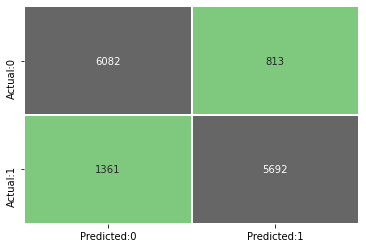

In [193]:
conf_mat = confusion_matrix(y_test, y_pred_rf4)
conf_mat_df4 = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_df4, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [194]:
cr = classification_report(y_test, y_pred_rf4)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      6895
           1       0.88      0.81      0.84      7053

    accuracy                           0.84     13948
   macro avg       0.85      0.84      0.84     13948
weighted avg       0.85      0.84      0.84     13948



In [195]:
roc_rf4  =  roc_auc_score(y_test, y_pred_rf4)
acc_rf4  =  accuracy_score(y_test, y_pred_rf4)
prec_rf4 =  precision_score(y_test, y_pred_rf4)
rec_rf4  =  recall_score(y_test, y_pred_rf4)
f1_rf4   =  f1_score(y_test, y_pred_rf4)


model= pd.DataFrame([
                     ['Random Forest Classifier with feature', acc_rf4, prec_rf4, rec_rf4, f1_rf4, roc_rf4]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,Random Forest Classifier with feature,0.844135,0.875019,0.807032,0.839652,0.84456


#### 4. Comparision between Average bill amount and pay amount of customer

In [196]:
# extracyed features - Average Bill Amount, Average Pay Amount

Avg_bill = (df3["BILL_AMT1"] + df3["BILL_AMT2"] + df3["BILL_AMT3"] + df3["BILL_AMT4"] + df3["BILL_AMT5"] + df3["BILL_AMT6"])/6
Avg_pay = (df3["PAY_AMT1"] + df3["PAY_AMT2"] + df3["PAY_AMT3"] + df3["PAY_AMT4"] + df3["PAY_AMT5"] + df3["PAY_AMT6"])/6

In [197]:
# replacing 0,1 to avoid nan and infinity

Avg_bill = Avg_bill.replace(0,1)
Avg_pay = Avg_pay.replace(0,1)

In [198]:
df4["Avg_Bill_VS_Pay"] = Avg_bill/Avg_pay

In [199]:
df4["Avg_Bill_VS_Pay"].describe()

count     29870.000000
mean        113.872176
std        2948.140279
min       -6467.833333
25%           1.392551
50%           9.410577
75%          23.164597
max      361977.666667
Name: Avg_Bill_VS_Pay, dtype: float64

#### Inference:

1. In Avg_Bill_VS_Pay column, If the value is greater than 1 than we can infer that customer is likely to default.

In [200]:
df4.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'AGE', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'defaulted',
       'OSTBILL_VS_LIMIT_BAL', 'Ost_VS_PrevAvgBill', 'Bill_3months_avg',
       'Bill_6months_avg', 'Avg_Bill_VS_Pay'],
      dtype='object')

In [201]:
X = df4.drop(["Bill_3months_avg", "Ost_VS_PrevAvgBill", "OSTBILL_VS_LIMIT_BAL", "defaulted", "Bill_6months_avg"],1)
y = df4.defaulted

sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(x_sm ,y_sm , test_size= 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32544, 26)
(13948, 26)
(32544,)
(13948,)


In [202]:
X_train.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'AGE', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'Avg_Bill_VS_Pay'],
      dtype='object')

### 4.1 Decision Tree

In [203]:
# define and fit Decision Tree classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [205]:
dt = DecisionTreeClassifier(random_state = 1)

model_dt = DecisionTreeClassifier(random_state=5)
model_dt.fit(X_train, y_train)

y_pred_dt5 = model_dt.predict(X_test)

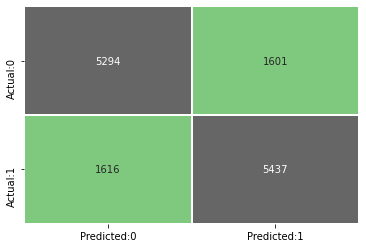

In [206]:
conf_mat = confusion_matrix(y_test, y_pred_dt5)
conf_mat_df5 = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_df5, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [207]:
cr = classification_report(y_test, y_pred_dt5)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6895
           1       0.77      0.77      0.77      7053

    accuracy                           0.77     13948
   macro avg       0.77      0.77      0.77     13948
weighted avg       0.77      0.77      0.77     13948



In [208]:
roc_dt5  =  roc_auc_score(y_test, y_pred_dt5)
acc_dt5  =  accuracy_score(y_test, y_pred_dt5)
prec_dt5 =  precision_score(y_test, y_pred_dt5)
rec_dt5  =  recall_score(y_test, y_pred_dt5)
f1_dt5   =  f1_score(y_test, y_pred_dt5)


model= pd.DataFrame([['Decision Tree Classifier with feature', acc_dt5, prec_dt5, rec_dt5, f1_dt5, roc_dt5]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,Decision Tree Classifier with feature,0.769358,0.772521,0.770878,0.771698,0.76934


### 4.2. XG Boost

In [158]:
# define and fit XG Boost classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [209]:
model_xgb = XGBClassifier(random_state = 1)
model_xgb.fit(X_train, y_train)

y_pred_xgb5 =model_xgb.predict(X_test)

[22:50:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


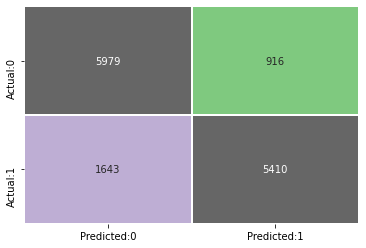

In [210]:
conf_mat = confusion_matrix(y_test, y_pred_xgb5)
conf_mat_xgb5 = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])
matrx = sns.heatmap(conf_mat_xgb5, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [211]:
cr = classification_report(y_test, y_pred_xgb5)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      6895
           1       0.86      0.77      0.81      7053

    accuracy                           0.82     13948
   macro avg       0.82      0.82      0.82     13948
weighted avg       0.82      0.82      0.82     13948



In [212]:
roc_xgb5  =  roc_auc_score(y_test, y_pred_xgb5)
acc_xgb5  =  accuracy_score(y_test, y_pred_xgb5)
prec_xgb5 =  precision_score(y_test, y_pred_xgb5)
rec_xgb5  =  recall_score(y_test, y_pred_xgb5)
f1_xgb5   =  f1_score(y_test, y_pred_xgb5)


model= pd.DataFrame([
                     ['XG Boost Classifier with feature', acc_xgb5, prec_xgb5, rec_xgb5, f1_xgb5, roc_xgb5]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,XG Boost Classifier with feature,0.816533,0.855201,0.767049,0.80873,0.8171


### 4.3. Random Forest

In [213]:
# define and fit Random Forest classifier model
# create a confusion matrix pass the actual and predicted values to the confusion_matrix()
# calculate various performance measures
# metrics for evaluating classifier performance

In [214]:
model_rf = RandomForestClassifier(random_state = 1)
model_rf.fit(X_train, y_train)

y_pred_rf5 = model_rf.predict(X_test)

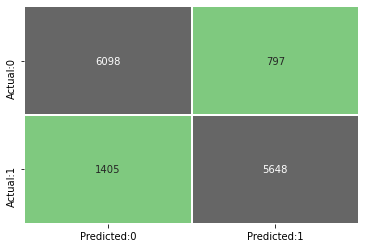

In [215]:
conf_mat = confusion_matrix(y_test, y_pred_rf5)

conf_mat_rf5 = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_rf5, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [216]:
cr = classification_report(y_test, y_pred_rf5)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      6895
           1       0.88      0.80      0.84      7053

    accuracy                           0.84     13948
   macro avg       0.84      0.84      0.84     13948
weighted avg       0.84      0.84      0.84     13948



In [217]:
roc_rf5  =  roc_auc_score(y_test, y_pred_rf5)
acc_rf5  =  accuracy_score(y_test, y_pred_rf5)
prec_rf5 =  precision_score(y_test, y_pred_rf5)
rec_rf5  =  recall_score(y_test, y_pred_rf5)
f1_rf5   =  f1_score(y_test, y_pred_rf5)


model= pd.DataFrame([
                     ['Random Forest Classifier with feature', acc_rf5, prec_rf5, rec_rf5, f1_rf5, roc_rf5]],
               columns = ['Model', 'Accuracy', 'Precision_(Class_1)', 'Recall_(Class_1)', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision_(Class_1),Recall_(Class_1),F1 Score,ROC
0,Random Forest Classifier with feature,0.842128,0.876338,0.800794,0.836865,0.842601


### Inference

1. Extracted Feature 1: Ost_vs_limit_bal
    
-- After checking model without above feature and including feature we have observed that our extracted feature is contributing to the model.

2. Extracted Feature 2: Ost_VS_PrevAvgBill
    
-- After checking model without above feature and including feature we have observed that our extracted feature is contributing to the model.

3. Extracted Feature 3: Bill_3months_avg and Bill_6months_avg 
    
-- After checking both model and comparing it with and without feature we have observed that 6 month average bill amount is contributing slightly better than 3 month average bill.

4.  Extracted Feature 4: Avg_Bill_VS_Pay
    
-- After checking model without above feature and including feature we have observed that our extracted feature is contributing to the model.

In [218]:
df4.columns, df4.shape

(Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
        'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
        'AGE', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'EDUCATION_6',
        'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'defaulted',
        'OSTBILL_VS_LIMIT_BAL', 'Ost_VS_PrevAvgBill', 'Bill_3months_avg',
        'Bill_6months_avg', 'Avg_Bill_VS_Pay'],
       dtype='object'),
 (29870, 31))

#### Correlation Between Extracted Features

In [169]:
New_Ftr = df4[["OSTBILL_VS_LIMIT_BAL",  "Ost_VS_PrevAvgBill", "Bill_3months_avg", "Bill_6months_avg", "Avg_Bill_VS_Pay"]]

New_Ftr.corr()

,OSTBILL_VS_LIMIT_BAL,Ost_VS_PrevAvgBill,Bill_3months_avg,Bill_6months_avg,Avg_Bill_VS_Pay
OSTBILL_VS_LIMIT_BAL,1.000000,0.034226,0.551898,0.513780,0.037323
Ost_VS_PrevAvgBill,0.034226,1.000000,-0.013972,-0.025074,0.243614
Bill_3months_avg,0.551898,-0.013972,1.000000,0.979111,0.027667
Bill_6months_avg,0.513780,-0.025074,0.979111,1.000000,0.026170
Avg_Bill_VS_Pay,0.037323,0.243614,0.027667,0.026170,1.000000


##### Observation:

1. After checking correlation matrix, Bill_3months_avg and Bill_6months_avg columns are highly correlated.
2. Hence we have decided to drop Bill_3months_avg column and proceed further.

In [272]:
df4 = df4.drop("Bill_3months_avg", 1)

# we have considered on dropping the above column.

### Model Building 

-- Model Building with extracted features

In [273]:
# checking cout of default values

df4["defaulted"].value_counts()

0    23246
1     6624
Name: defaulted, dtype: int64

In [274]:
# information - rows and columns in the data

df4.shape

(29870, 30)

In [275]:
# Precentage of default customers

print("Percentage count of default customers: ", (6624/ (23246 + 6624)) * 100)

Percentage count of default customers:  22.176096417810513


#### Observation: 
  Here we found the target column is imbalanced and we need to fix it by oversampling of minority class

#### Handling Imbalanced Target Column Using SMOTE

This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [276]:
from imblearn.over_sampling import SMOTE

In [277]:
# over sampling the data for independent and target variables

X = df4.drop("defaulted",1)
y = df4.defaulted

# fitting values in SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X,y)

In [278]:
# checking for shape of x and y respectively
print(x_sm.shape)
print(y_sm.shape)

(46492, 29)
(46492,)


In [279]:
x_sm.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'AGE', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'OSTBILL_VS_LIMIT_BAL',
       'Ost_VS_PrevAvgBill', 'Bill_6months_avg', 'Avg_Bill_VS_Pay'],
      dtype='object')

##### Train Test Split

In [280]:
X_train, X_test, y_train, y_test = train_test_split(x_sm ,y_sm , test_size= 0.3, random_state=5)

In [281]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32544, 29)
(13948, 29)
(32544,)
(13948,)


### 1. Using Decision Tree 

##### 2.1 Decision Tree without Hyperparameter Tunning

In [282]:
from sklearn.tree import DecisionTreeClassifier

In [283]:
model_dt = DecisionTreeClassifier(random_state = 1)

model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

#### Evaluation Metrics

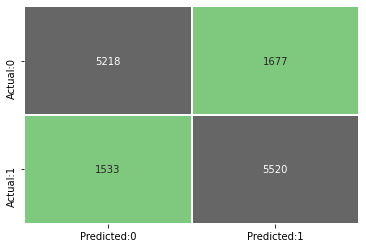

In [284]:
conf_mat = confusion_matrix(y_test, y_pred_dt)

conf_mat_df = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_df, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [233]:
cr = classification_report(y_test, y_pred_dt)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      6895
           1       0.76      0.77      0.77      7053

    accuracy                           0.76     13948
   macro avg       0.76      0.76      0.76     13948
weighted avg       0.76      0.76      0.76     13948



In [183]:
auc_score = roc_auc_score(y_test, y_pred_dt)
print("Accuracy Score: ",auc_score)

Accuracy Score:  0.7683844900832163


##### 2.2: Hyperparameter Tunning in Decision Tree

In [285]:
from sklearn.model_selection import RandomizedSearchCV

In [286]:
params = {"criterion" : ["gini", "entropy"],
         "max_depth": range(1,400),
         "max_leaf_nodes": range(1,20)}

In [287]:
random_search = RandomizedSearchCV(model_dt, param_distributions= params, cv =3)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 400),
                                        'max_leaf_nodes': range(1, 20)})

In [288]:
#printing the best possible values to enhance accuracy

print(random_search.best_params_)
print(random_search.best_estimator_)

#printing the best score

print(random_search.best_score_)

{'max_leaf_nodes': 19, 'max_depth': 206, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=206, max_leaf_nodes=19, random_state=1)
0.7605088495575222


#### Pruned Tree

Pruning a Decision tree refers to simplifying/compressing and optimizing it by removing parts of the tree that are not adding value in reducing the classification error and are redundant.

In [289]:
model_dt_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 206, max_leaf_nodes= 19, random_state = 1)

model_dt_1.fit(X_train, y_train)

y_pred_dt1 = model_dt_1.predict(X_test)

In [290]:
##### Evaluation Metrics

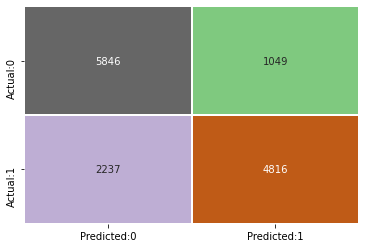

In [291]:
conf_mat = confusion_matrix(y_test, y_pred_dt1)

conf_mat_df = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_df, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [292]:
cr = classification_report(y_test, y_pred_dt1)
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.85      0.78      6895
           1       0.82      0.68      0.75      7053

    accuracy                           0.76     13948
   macro avg       0.77      0.77      0.76     13948
weighted avg       0.77      0.76      0.76     13948



In [293]:
auc_score = roc_auc_score(y_test, y_pred_dt1)
print("Accuracy Score: ",auc_score)

Accuracy Score:  0.7653453850453938


##### Observation:

1. Decision Tree model is performing good without hyperparameter tunning, because in tunned model our defaulted target customers (class 1) are decreasing.

2. In our target defaulted class, false Negative which is threat for our model are increasing in tunned Decision Tree.

3. False Negative means our target defaulted class (class 1) is wrongly classified as non-defaulted class (class 0). 

4. Hence our objective is reduce the False Negative, so that we can help to improve the banking system to predict the defaulters.

#### 2. Random Forest Classifier

#### 4.2.1 Using Random Forest without hyperparameter tunning

In [243]:
from sklearn.ensemble import RandomForestClassifier

In [294]:
model_rf = RandomForestClassifier(random_state = 1)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

##### Evaluation Metrics

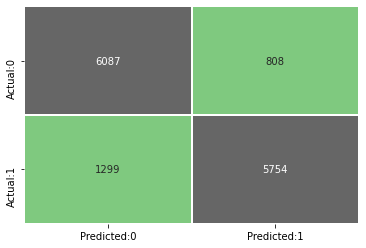

In [295]:
conf_mat = confusion_matrix(y_test, y_pred_rf)

conf_mat_df = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_df, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [296]:
cr = classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      6895
           1       0.88      0.82      0.85      7053

    accuracy                           0.85     13948
   macro avg       0.85      0.85      0.85     13948
weighted avg       0.85      0.85      0.85     13948



In [297]:
auc_score = roc_auc_score(y_test, y_pred_rf)
print("Accuracy Score: ",auc_score)

Accuracy Score:  0.8493183435435031


#### 4.2.2 Using Random Forest with hyperparameter tunning

In [298]:
RandomForestClassifier(random_state = 10)

RandomForestClassifier(random_state=10)

In [299]:
params = {"n_estimators": range(1,200),
         "criterion": ["gini", "entropy"],
         "max_depth": range(1,20),
         "min_samples_split" : range(1,10)}

In [300]:
random_search = RandomizedSearchCV(model_rf, param_distributions = params, cv = 3)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': range(1, 200)})

In [301]:
#printing the best possible values to enhance accuracy

print(random_search.best_params_)
print(random_search.best_estimator_)

#printing the best score

print(random_search.best_score_)

{'n_estimators': 120, 'min_samples_split': 9, 'max_depth': 15, 'criterion': 'gini'}
RandomForestClassifier(max_depth=15, min_samples_split=9, n_estimators=120,
                       random_state=1)
0.8190757128810225


In [302]:
model_rf1 = RandomForestClassifier(n_estimators = 120, criterion = "gini", max_depth = 15, max_features = None, min_samples_split = 9)
model_rf1.fit(X_train, y_train)

y_pred_rf1 = model_rf1.predict(X_test)

#### Evaluation Metrics

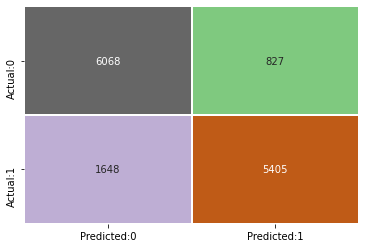

In [303]:
conf_mat = confusion_matrix(y_test, y_pred_rf1)

conf_mat_df = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_df, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [304]:
cr = classification_report(y_test, y_pred_rf1)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      6895
           1       0.87      0.77      0.81      7053

    accuracy                           0.82     13948
   macro avg       0.83      0.82      0.82     13948
weighted avg       0.83      0.82      0.82     13948



In [255]:
auc_score = roc_auc_score(y_test, y_pred_rf1)
print("Accuracy Score: ",auc_score)

Accuracy Score:  0.8304178442985344


#### Observation:
1. Random Forest model is performing good.
2. In our target defaulted class, false Negative which is threat for our model is increasing.
3. False Negative means our target defaulted class (class 1) is wrongly classified as non-defaulted class (class 0).
4. Hence our objective is reduce the False Negative, so that we can help to improve the banking system to predict the defaulters.

#### Bagging and Boosting 

Bagging (stands for Bootstrap Aggregating) is a way to decrease the variance of your prediction by generating additional data for training from your original dataset using combinations with repetitions to produce multisets of the same cardinality/size as your original data. By increasing the size of your training set you can't improve the model predictive force, but just decrease the variance, narrowly tuning the prediction to expected outcome.

Boosting is a two-step approach, where one first uses subsets of the original data to produce a series of averagely performing models and then "boosts" their performance by combining them together using a particular cost function (=majority vote). Unlike bagging, in the classical boosting the subset creation is not random and depends upon the performance of the previous models: every new subsets contains the elements that were (likely to be) misclassified by previous models.

#### 1. Bagging Classifier Using Decision Tree

In [305]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [306]:
model_bg_dt = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=10)

model_bg_dt.fit(X_train, y_train)

y_pred_bg_dt = model_bg_dt.predict(X_test)

In [307]:
##### Evalution Metrics

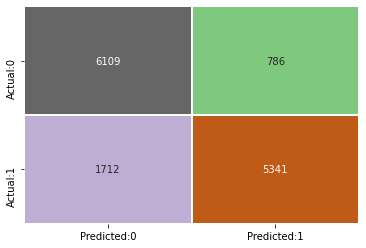

In [308]:
conf_mat = confusion_matrix(y_test, y_pred_bg_dt)

conf_mat_df = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_df, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [311]:
cr = classification_report(y_test, y_pred_bg_dt)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      6895
           1       0.87      0.76      0.81      7053

    accuracy                           0.82     13948
   macro avg       0.83      0.82      0.82     13948
weighted avg       0.83      0.82      0.82     13948



In [312]:
auc_score = roc_auc_score(y_test, y_pred_bg_dt)
print("Accuracy Score: ",auc_score)

Accuracy Score:  0.8216353812175441


#### Inference
1. In Bagging Technique the 

#### 2. Boosting Techniques

#### 1. Adaboost Using Decision Tree

In [313]:
from sklearn.ensemble import AdaBoostClassifier

In [314]:
model_adb = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), random_state=5) # by default DT

model_adb.fit(X_train, y_train)

y_pred_adb = model_adb.predict(X_test)

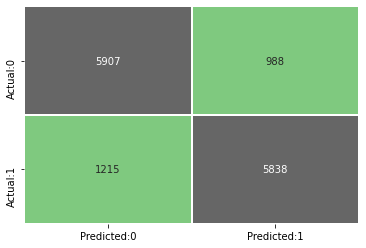

In [315]:
conf_mat = confusion_matrix(y_test, y_pred_adb)

conf_mat_df = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_df, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [316]:
cr = classification_report(y_test, y_pred_adb)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      6895
           1       0.86      0.83      0.84      7053

    accuracy                           0.84     13948
   macro avg       0.84      0.84      0.84     13948
weighted avg       0.84      0.84      0.84     13948



In [571]:
auc_score = roc_auc_score(y_test, y_pred_adb)
print("Accuracy Score: ",auc_score)

Accuracy Score:  0.8660455638531713


#### 2. Gradient Boosting Using Decision Tree

Gradient boosting is based on Decision Tree Classifier

In [317]:
from sklearn.ensemble import GradientBoostingClassifier

In [318]:
model_gb = GradientBoostingClassifier(random_state=5)

model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

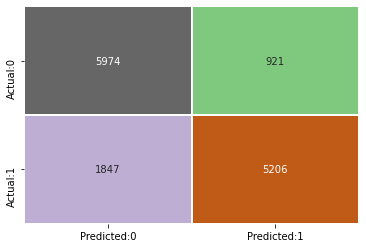

In [319]:
conf_mat = confusion_matrix(y_test, y_pred_gb)

conf_mat_df = pd.DataFrame(conf_mat, index = ["Actual:0", "Actual:1"], columns = ["Predicted:0", "Predicted:1"])

matrx = sns.heatmap(conf_mat_df, annot = True, cbar = False, fmt ="d", cmap = "Accent", linewidths = 1)

In [320]:
cr = classification_report(y_test, y_pred_gb)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      6895
           1       0.85      0.74      0.79      7053

    accuracy                           0.80     13948
   macro avg       0.81      0.80      0.80     13948
weighted avg       0.81      0.80      0.80     13948



### Inference

Ada Boost Classifier and Gradient Boost model is performing good, because our defaulted target customers (class 1) are increasing in True Positive.

In our target defaulted class, false Negative which is threat for our model are slightly decreasing.

False Negative means our target defaulted class (class 1) is wrongly classified as non-defaulted class (class 0).

Hence our objective is reduce the False Negative, so that we can help to improve the banking system to predict the defaulters.

#### For Final Model Evaluation we are referreing Confusion Matrix

Precision is a good measure to determine, when the costs of False Positive is high.
Recall calculates how many of the True Positives our model capture through labeling it as Positive (True Positive).

#### Conclusion